## Corpus BSV

In [336]:
import os

In [339]:
gc = os.listdir("resources/Corpus-v-12-04-21/train/CorpusTestD2kabGC.html")
maraichage = os.listdir("resources/Corpus-v-12-04-21/train/CorpusTestD2kabMaraichage.html")
viticulture = os.listdir("resources/Corpus-v-12-04-21/train/CorpusTestD2kabViti.html")
corpus_len = len(viticulture) + len(maraichage) + len(gc)
corpus_len

230

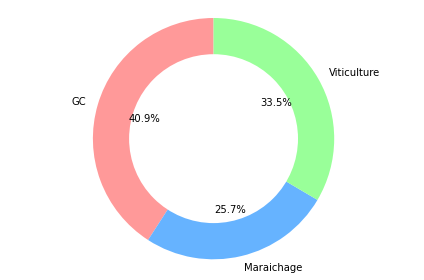

In [341]:
import matplotlib.pyplot as plt
# Pie chart
labels = 'GC', 'Maraichage', 'Viticulture'
sizes = [len(gc), len(maraichage), len(viticulture)]
#colors
colors = ['#ff9999','#66b3ff','#99ff99']
 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

# Term frequency

#### Create df 

In [286]:
import pandas as pd
fcu = pd.read_csv("output/fcu.csv", delimiter="\t", encoding='utf-8')
fcu

bsv  type               context  \
0      20180911_bsv_grandes_cultures-26_cle0f15a8  html            ACTUALITÉS   
1      20180911_bsv_grandes_cultures-26_cle0f15a8  html   es grosses altises.   
2      20180911_bsv_grandes_cultures-26_cle0f15a8  html   A LOIRE BSV GRANDES   
3      20180911_bsv_grandes_cultures-26_cle0f15a8  html   ion 12 parcelles de   
4      20180911_bsv_grandes_cultures-26_cle0f15a8  html   logique et état des   
...                                           ...   ...                   ...   
11868  bsv_viti_mp_gaillac_n18_30072019_cle0fe8aa  html   printemps, comme la   
11869  bsv_viti_mp_gaillac_n18_30072019_cle0fe8aa  html   tenir des stocks de   
11870  bsv_viti_mp_gaillac_n18_30072019_cle0fe8aa  html   rges de gestion des   
11871  bsv_viti_mp_gaillac_n18_30072019_cle0fe8aa  html   ution d'un stock de   
11872  bsv_viti_mp_gaillac_n18_30072019_cle0fe8aa  html  www.terresinovia.fr/   

            word  prefLabel             context.1     location  \
0          Colza      colza   Limaces à surveille        13-18   
1           Maïs       maïs    Compter les larves      151-155   
2       CULTURES    Culture  -DU 11 SEPTEMBRE N °      313-321   
3          colza      colza   sont renseignées ce      469-474   
4       cultures    Culture   Les parcelles du ré      672-680   
...          ...        ...                   ...          ...   
11868    jachère        gel   fleurie qui a un fa  24717-24724   
11869   semences    semence   d'ambroisie. Les da  24920-24928   
11870   jachères        gel   sont très favorable  25022-25030   
11871   semences    semence   qui sera particuliè  25558-25566   
11872  tournesol  tournesol  /cultiver-du-tournes  25666-25675   

                                                features  
0      type=GOL, uri=http://ontology.inrae.fr/frenchc...  
1      type=GOL, uri=http://ontology.inrae.fr/frenchc...  
2      type=GOL, uri=http://ontology.inrae.fr/frenchc...  
3      type=GOL, uri=http://ontology.inrae.fr/frenchc...  
4      type=GOL, uri=http://ontology.inrae.fr/frenchc...  
...                                                  ...  
11868  type=GOL, uri=http://ontology.inrae.fr/frenchc...  
11869  type=GOL, uri=http://ontology.inrae.fr/frenchc...  
11870  type=GOL, uri=http://ontology.inrae.fr/frenchc...  
11871  type=GOL, uri=http://ontology.inrae.fr/frenchc...  
11872  type=GOL, uri=http://ontology.inrae.fr/frenchc...  

[11873 rows x 8 columns]

In [342]:
fcu.describe()

bsv   type  \
count                                               11873  11873   
unique                                                230      1   
top     BSV_legumes_allium_pomme_de_terre_AURA_2019-14...   html   
freq                                                  325  11873   

                    context      word prefLabel            context.1 location  \
count                 11856     11873     11873                11872    11873   
unique                 6318       529       174                 6715    10843   
top     protection de leurs  cultures   Culture  Édition Midi-Pyréné     1-12   
freq                    162      1004      1990                  117       11   

                                                 features  
count                                               11873  
unique                                                557  
top     type=GOL, uri=http://ontology.inrae.fr/frenchc...  
freq                                                 1004

#### Count top occurrences

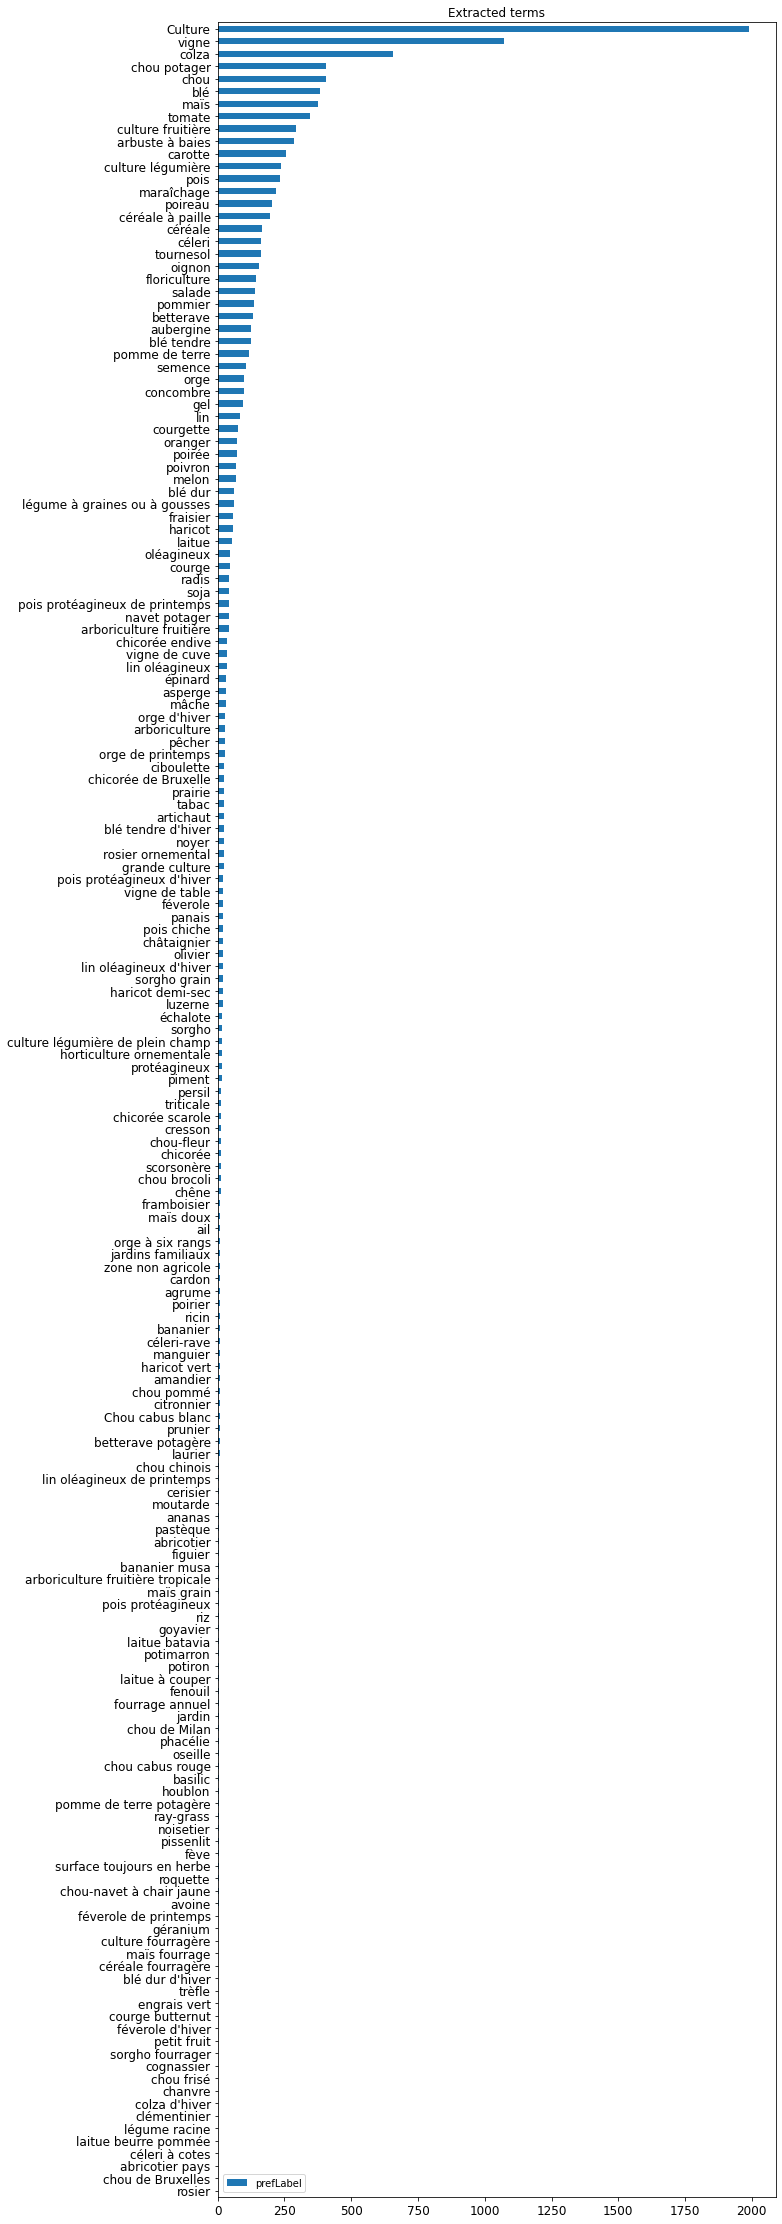

In [392]:
counts = fcu['prefLabel'].value_counts()
dico = counts.to_dict()
ax = counts.plot(kind='barh', title ="Extracted terms",figsize=(10,40),legend=True, fontsize=12 )
ax.invert_yaxis()

In [393]:
import plotly.graph_objects as go
import plotly.express as px

features = list(dico.values()) 
true_labels = list(dico.keys())
size = [20, 40, 60, 80, 100, 80, 60, 40, 20, 40]
freq_df = px.data.iris() # iris is a pandas DataFrame
fig = px.scatter(freq_df, x=true_labels, y=features)
fig.show()

#### Group by theme

In [398]:
fcu_bsv = fcu['bsv'].tolist()
fcu_gc = []
fcu_m = []
fcu_viti = []

for fic in fcu_bsv:
    fic = fic + ".html"
    if fic in gc:
        fcu_gc.append(fic)
    if fic in maraichage:
        fcu_m.append(fic)
    if fic in viticulture:
        fcu_viti.append(fic)


print("Total des termes FCU extraites : {}".format(len(fcu_gc) + len(fcu_m) + len(fcu_viti)))
print("\nMaraichage : {} termes dans {}/{} bsv differents".format(len(fcu_m), len(set(fcu_m)), len(maraichage) ))
print("GC : {} termes dans {}/{} bsv differents".format(len(fcu_gc), len(set(fcu_gc)), len(gc) ))
print("Viticulture : {} termes dans {}/{} bsv differents".format(len(fcu_viti), len(set(fcu_viti)) , len(viticulture) ))

Total des termes FCU extraites : 11873

Maraichage : 5511 termes dans 59/59 bsv differents
GC : 4373 termes dans 94/94 bsv differents
Viticulture : 1989 termes dans 77/77 bsv differents


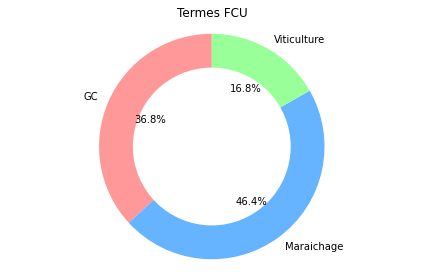

In [345]:
import matplotlib.pyplot as plt
# Pie chart
labels = 'GC', 'Maraichage', 'Viticulture'
sizes = [len(fcu_gc), len(fcu_m), len(fcu_viti)]
#colors
colors = ['#ff9999','#66b3ff','#99ff99']
 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
ax1.set_title("Termes FCU")
plt.tight_layout()
plt.show()

In [399]:
tf = fcu[['bsv','prefLabel']].groupby(['bsv', 'prefLabel'])['prefLabel'] \
                             .count() \
                             .reset_index(name='count') \
                             .sort_values(['count'], ascending=False) \
                             



fcu_bsv = tf['bsv'].tolist()
fcu_theme = []

for fic in fcu_bsv:
    fic = fic + ".html"
    if fic in gc:
        fcu_theme.append("GC")
    if fic in maraichage:
        fcu_theme.append("Maraichage")
    if fic in viticulture:
        fcu_theme.append("Viticulture")
        
tf['theme'] = fcu_theme
tf[:5]

bsv        prefLabel  \
1676  BSV_legumes_allium_pomme_de_terre_AURA_2019-8_...          Culture   
1628  BSV_legumes_allium_pomme_de_terre_AURA_2019-14...          Culture   
1474       BSV_cereales_paille_15_du_16-04-19_cle81e145              blé   
1582  BSV_legumes_allium_pomme_de_terre_AURA_2019-12...          Culture   
427                 BSV-viti-RA-15_09-07-2019_cle01ba24  arbuste à baies   

      count        theme  
1676     74   Maraichage  
1628     64   Maraichage  
1474     62           GC  
1582     62   Maraichage  
427      54  Viticulture

In [382]:
import plotly.express as px
  
df = px.data.iris()  
fig = px.sunburst(tf, path=[ 'theme','bsv','prefLabel'], 
                  values='count')
fig.update_layout(
    margin=dict(t=200, r=200, b=200, l=200),
    showlegend=False,
    width=2000, height=2000,
    autosize=False)

fig.write_html("output/theme_bsv_tf.html")
fig.show()

In [383]:
import plotly.express as px
  
df = px.data.iris()
  
fig = px.sunburst(tf, path=[ 'theme','prefLabel'], 
                  values='count')
fig.update_layout(
    margin=dict(t=200, r=200, b=200, l=200),
    showlegend=False,
    width=2500, height=2500,
    autosize=False)

fig.write_html("output/theme_tf.html")
fig.show()

In [295]:
import plotly.io as pio


data = [dict(
  type = 'scatter',
  x = fcu['prefLabel'].str.lower(),
  y = fcu['bsv'],
  mode = 'markers',
  transforms = [dict(
    type = 'groupby',
    groups = df['prefLabel'].str.lower(),
    
  )]
)]

fig_dict = dict(data=data)
pio.show(fig_dict, validate=False)

#### BBCH

In [400]:
import pandas as pd
bbch = pd.read_csv("output/bbch.csv", delimiter="\t", encoding='utf-8')
bbch[:5]

bsv               context  \
0  20190227_BSV_grandes_cultures_Auvergne_N02_cle...  , avec le stade C2 (   
1  20190228_BSV_grandes_cultures_Rhone-Alpes_N_02...  ée est au stade D1 (   
2        20190320_LOR_BSV_Grandes_Cultures_cle83816d   boutons accolés(D1-   
3        20190320_LOR_BSV_Grandes_Cultures_cle83816d  e boutons séparés(E-   
4        20190417_ALS_BSV_Grandes_Cultures_cle8c93cf   outons accolés (D1)   

     word             context.1   location  \
0  BBCH31  ) majoritaire sur ce    905-911   
1  BBCH50   ) c'est-à-dire avec    949-955   
2  BBCH50  ) 1 méligèthe/plante  6951-6957   
3  BBCH57  ) 2-3 méligèthes/pla  7120-7126   
4  BBCH50    1 méligèthe/plante  2840-2846   

                                         features  
0  type=BBCH, canonical-form=BBCH 31, form=BBCH31  
1  type=BBCH, canonical-form=BBCH 50, form=BBCH50  
2  type=BBCH, canonical-form=BBCH 50, form=BBCH50  
3  type=BBCH, canonical-form=BBCH 57, form=BBCH57  
4  type=BBCH, canonical-form=BBCH 50, form=BBCH50

In [401]:
bbch.describe()

bsv               context  \
count                                        191                   191   
unique                                        46                   158   
top     BSV_GC_NA_Limousin_13_20190521_cle0cb17e  olte > 2e couronne (   
freq                                          20                     4   

           word            context.1   location  \
count       191                  191        191   
unique       90                  152        180   
top     BBCH 89  Descriptif des stad  1347-1377   
freq         15                    8          3   

                                                 features  
count                                                 191  
unique                                                100  
top     type=BBCH-DD, canonical-form=BBCH 89, form=BBC...  
freq                                                   15

In [402]:
bsv = bbch['bsv'].tolist()
bbch_gc = [fic for fic in bsv if fic in gc]
bbch_m = []
bbch_viti = []

for fic in bsv:
    fic = fic + ".html" #print(fic)
    if fic in gc:
        bbch_gc.append(fic)
    if fic in maraichage:
        bbch_m.append(fic)
    if fic in viticulture:
        bbch_viti.append(fic)

In [403]:
print("Total des termes BBCH extraites : {}".format(len(bbch_gc) + len(bbch_m) + len(bbch_viti)))

print("\nMaraichage : {} termes dans {}/{} bsv differents".format(len(bbch_m), len(set(bbch_m)), len(maraichage) ))
print("GC : {} termes dans {}/{} bsv differents".format(len(bbch_gc), len(set(bbch_gc)), len(gc) ))
print("Viticulture : {} termes dans {}/{} bsv differents".format(len(bbch_viti), len(set(bbch_viti)) , len(viticulture) ))

Total des termes BBCH extraites : 191

Maraichage : 32 termes dans 5/59 bsv differents
GC : 120 termes dans 28/94 bsv differents
Viticulture : 39 termes dans 13/77 bsv differents


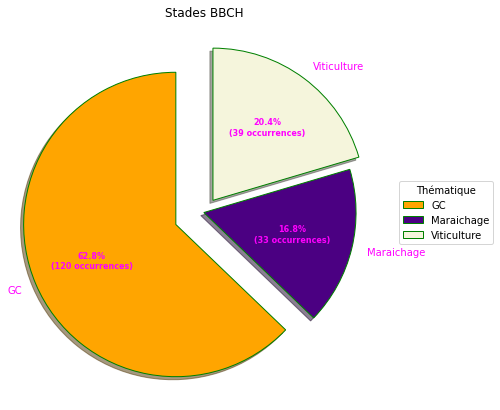

In [404]:
import matplotlib.pyplot as plt
# Pie chart
labels = 'GC', 'Maraichage', 'Viticulture'
sizes = [len(bbch_gc), len(bbch_m), len(bbch_viti)]
#colors
colors = ['#ff9999','#66b3ff','#99ff99']
 
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
  
labels = ['GC', 'Maraichage', 'Viticulture']
  
data = [len(bbch_gc), len(bbch_m), len(bbch_viti)]
  
explode = (0.2, 0.0, 0.1)
  
# Creating color parameters
colors = ( "orange",
           "indigo", "beige")
  
# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "green" }
  
# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues)) + 1
    return "{:.1f}%\n({:d} occurrences)".format(pct, absolute)
  
# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(data, 
                                  autopct = lambda pct: func(pct, data),
                                  explode = explode, 
                                  labels = labels,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="magenta"))
  
# Adding legend
ax.legend(wedges, labels,
          title ="Thématique",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
  
plt.setp(autotexts, size = 8, weight ="bold")
ax.set_title("Stades BBCH")
  
# show plot
plt.show()

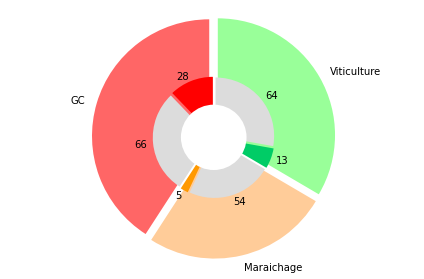

In [405]:
# Import libraries
from matplotlib import pyplot as plt
import numpy as np
# Data to plot
labels = ['GC', 'Maraichage', 'Viticulture']
sizes = [len(gc), len(maraichage), len(viticulture)]

sizes_gender = [len(set(bbch_gc)), len(gc)-len(set(bbch_gc)),len(set(bbch_m)),len(maraichage)-len(set(bbch_m)),len(set(bbch_viti)), len(viticulture)-len(set(bbch_viti))]
colors = ['#ff6666', '#ffcc99', '#99ff99']
colors_gender = ['#FF0000','#DCDCDC' ,'#FF9900','#DCDCDC' ,'#00CC66','#DCDCDC' ]
explode = (0.2,0.2,0.2) 
explode_gender = (0.1,0.1,0.1, 0.1,0.1,0.1)
#Plot
plt.pie(sizes, labels=labels, colors=colors, startangle=90,frame=True, explode=explode,radius=5)
plt.pie(sizes_gender,labels=sizes_gender,colors=colors_gender,startangle=90, explode=explode_gender,radius=2.5 )
#Draw circle
centre_circle = plt.Circle((0,0),1.4,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis('equal')
plt.tight_layout()

plt.show()


In [406]:
bbch_bsv = bbch['bsv'].tolist()
bbch_theme = []

for fic in bbch_bsv:
    fic = fic + ".html"
    if fic in gc:
        bbch_theme.append("GC")
    if fic in maraichage:
        bbch_theme.append("Maraichage")
    if fic in viticulture:
        bbch_theme.append("Viticulture")
        
bbch['theme'] = bbch_theme
bbch[:5]

bsv               context  \
0  20190227_BSV_grandes_cultures_Auvergne_N02_cle...  , avec le stade C2 (   
1  20190228_BSV_grandes_cultures_Rhone-Alpes_N_02...  ée est au stade D1 (   
2        20190320_LOR_BSV_Grandes_Cultures_cle83816d   boutons accolés(D1-   
3        20190320_LOR_BSV_Grandes_Cultures_cle83816d  e boutons séparés(E-   
4        20190417_ALS_BSV_Grandes_Cultures_cle8c93cf   outons accolés (D1)   

     word             context.1   location  \
0  BBCH31  ) majoritaire sur ce    905-911   
1  BBCH50   ) c'est-à-dire avec    949-955   
2  BBCH50  ) 1 méligèthe/plante  6951-6957   
3  BBCH57  ) 2-3 méligèthes/pla  7120-7126   
4  BBCH50    1 méligèthe/plante  2840-2846   

                                         features theme  
0  type=BBCH, canonical-form=BBCH 31, form=BBCH31    GC  
1  type=BBCH, canonical-form=BBCH 50, form=BBCH50    GC  
2  type=BBCH, canonical-form=BBCH 50, form=BBCH50    GC  
3  type=BBCH, canonical-form=BBCH 57, form=BBCH57    GC  
4  type=BBCH, canonical-form=BBCH 50, form=BBCH50    GC

In [449]:
list_of_forms = bbch['features'].values.tolist()
list_of_forms = [line.split(', canonical-form')[1:2] for line in list_of_forms]
list_of_forms = [' '.join(line) for line in list_of_forms]
list_of_forms = [line.split(',')[:1] for line in list_of_forms]
list_of_forms = [' '.join(line) for line in list_of_forms]
list_of_forms = [line.split('=')[1:] for line in list_of_forms]
list_of_forms = [' '.join(line) for line in list_of_forms]
list_of_forms = [line.replace(' - ', "-") for line in list_of_forms]
list_of_forms = [line.replace('- ', "-") for line in list_of_forms]
list_of_forms = [line.replace(' -', " ") for line in list_of_forms]
#list_of_forms = [intervals.append(line.split('-')[:-1]) for line in list_of_forms]
#list_of_forms = [line.replace('-', " ") for line in list_of_forms]
set(list_of_forms)

{'BBCH 00',
 'BBCH 01',
 'BBCH 01-03',
 'BBCH 05',
 'BBCH 09',
 'BBCH 09-10',
 'BBCH 10',
 'BBCH 10 ',
 'BBCH 11',
 'BBCH 11-12',
 'BBCH 12',
 'BBCH 12-13',
 'BBCH 13',
 'BBCH 13-17',
 'BBCH 14',
 'BBCH 14-53',
 'BBCH 15',
 'BBCH 16',
 'BBCH 17',
 'BBCH 18',
 'BBCH 19',
 'BBCH 21',
 'BBCH 29',
 'BBCH 30',
 'BBCH 31',
 'BBCH 32',
 'BBCH 37',
 'BBCH 39',
 'BBCH 45',
 'BBCH 50',
 'BBCH 5051',
 'BBCH 51',
 'BBCH 53',
 'BBCH 55',
 'BBCH 57',
 'BBCH 59',
 'BBCH 60',
 'BBCH 61',
 'BBCH 62',
 'BBCH 64-65',
 'BBCH 65',
 'BBCH 66-61',
 'BBCH 68',
 'BBCH 69',
 'BBCH 70',
 'BBCH 71',
 'BBCH 72',
 'BBCH 73',
 'BBCH 75',
 'BBCH 76',
 'BBCH 77',
 'BBCH 79',
 'BBCH 81',
 'BBCH 89'}

In [450]:

bbch['prefLabel'] = list_of_forms

In [451]:
tf_bbch = bbch[['bsv','prefLabel','theme']].groupby(['bsv', 'prefLabel', 'theme'])['prefLabel'] \
                             .count() \
                             .reset_index(name='count') \
                             .sort_values(['count'], ascending=False) \
                             

tf_bbch

bsv   prefLabel  \
115  bsv_maraichage_no18_du_20_Septembre_2019_cle01...     BBCH 89   
114  bsv_maraichage_no17_du_09_Septembre_2019_cle0c...     BBCH 89   
86   BSV_NA_LEGUMES_PC__INDUSTRIE_08_20190704_cle03...     BBCH 00   
39            BSV_GC_NA_Limousin_13_20190521_cle0cb17e     BBCH 00   
90   BSV_NA_LEGUMES_PC__INDUSTRIE_08_20190704_cle03...     BBCH 61   
..                                                 ...         ...   
45            BSV_GC_NA_Limousin_13_20190521_cle0cb17e     BBCH 14   
44            BSV_GC_NA_Limousin_13_20190521_cle0cb17e  BBCH 11-12   
43            BSV_GC_NA_Limousin_13_20190521_cle0cb17e  BBCH 09-10   
42            BSV_GC_NA_Limousin_13_20190521_cle0cb17e     BBCH 09   
149                 bsv_viti_lr_n17_30072019_cle8cc4c8     BBCH 89   

           theme  count  
115   Maraichage      6  
114   Maraichage      6  
86    Maraichage      3  
39            GC      3  
90    Maraichage      3  
..           ...    ...  
45            GC      1  
44            GC      1  
43            GC      1  
42            GC      1  
149  Viticulture      1  

[150 rows x 4 columns]

In [452]:
import plotly.express as px
  
df = px.data.iris()
  
fig = px.sunburst(tf_bbch, path=[ 'theme','prefLabel'], 
                  values='count')
fig.update_layout(
    margin=dict(t=200, r=200, b=200, l=200),
    showlegend=False,
    width=2500, height=2500,
    autosize=False)

fig.write_html("output/theme_bbch.html")
fig.show()

In [453]:
import plotly.express as px
  
df = px.data.iris()
  
fig = px.sunburst(tf_bbch, path=[ 'theme', 'bsv','prefLabel'], 
                  values='count')
fig.update_layout(
    margin=dict(t=200, r=200, b=200, l=200),
    showlegend=False,
    width=2500, height=2500,
    autosize=False)

fig.write_html("output/theme_bsv_bbch.html")
fig.show()

# Tf-idf

In [333]:
tf_idf = pd.read_csv("output/tfidf.csv", delimiter="\t", encoding='utf-8')
tf_idf.columns = ['bsv', 'prefLabel', 'score']
tf_idf

bsv        prefLabel      score
0     20180911_bsv_grandes_cultures-26_cle0f15a8             maïs  10.543776
1     20180911_bsv_grandes_cultures-26_cle0f15a8          prairie   5.906345
2     20180911_bsv_grandes_cultures-26_cle0f15a8    maïs fourrage   4.744932
3     20180911_bsv_grandes_cultures-26_cle0f15a8  fourrage annuel   4.339467
4     20180911_bsv_grandes_cultures-26_cle0f15a8              blé   3.092518
...                                          ...              ...        ...
2536  bsv_viti_mp_gaillac_n18_30072019_cle0fe8aa  arbuste à baies   2.935575
2537  bsv_viti_mp_gaillac_n18_30072019_cle0fe8aa           pêcher   2.393557
2538  bsv_viti_mp_gaillac_n18_30072019_cle0fe8aa    vigne de cuve   1.972343
2539  bsv_viti_mp_gaillac_n18_30072019_cle0fe8aa          céréale   1.233387
2540  bsv_viti_mp_gaillac_n18_30072019_cle0fe8aa          Culture   1.140902

[2541 rows x 3 columns]

In [334]:
bsv_tfidf = tf_idf['bsv'].values.tolist()
labels_tfidf =  tf_idf['prefLabel'].values.tolist()
counts_tfidf = tf_idf['score'].values.tolist()


In [335]:
import plotly.graph_objects as go

  
fig = go.Figure(data=go.Heatmap(
  x=labels_tfidf, y=bsv_tfidf, z=counts_tfidf,))
  
fig.update_layout(
    margin=dict(t=200, r=200, b=200, l=200),
    showlegend=False,
    width=1500, height=1500,
    autosize=False)
  
fig.show()

#### Concepts

In [179]:
# concepts associés
fcu['prefLabel'].describe()

count       11873
unique        174
top       Culture
freq         1990
Name: prefLabel, dtype: object

In [274]:
# ontologie fcu contient 399 concepts
from owlready2 import *
onto = get_ontology("resources/usageCulture20210112.rdf").load()
onto

get_ontology("http://ontology.inrae.fr/frenchcropusage/")

In [459]:
onto = get_ontology("resources/usageCulture20210112.rdf").load()
concepts = {}
for i in onto.individuals():
    prefs = i.prefLabel
    if len(prefs) == 0:
        sys.stderr.write('no prefLabel, ignoring %s\n' % i.iri)
        continue
    pref = prefs[0]
    print('%s\t%s' % (pref, i.iri))
    concepts[i.iri] = pref

abricotier	http://ontology.inrae.fr/frenchcropusage/Abricotiers
arbre fruitier à noyau	http://ontology.inrae.fr/frenchcropusage/Arbres_noyaux
arboriculture fruitière	http://ontology.inrae.fr/frenchcropusage/Arboriculture_fruitiere
litchi chinensis	http://ontology.inrae.fr/frenchcropusage/Litchis
longanier	http://ontology.inrae.fr/frenchcropusage/Longaniers
manguier	http://ontology.inrae.fr/frenchcropusage/Manguiers
ramboutan	http://ontology.inrae.fr/frenchcropusage/Ramboutans
cerisier	http://ontology.inrae.fr/frenchcropusage/Cerisiers
olivier fruit à noyaux	http://ontology.inrae.fr/frenchcropusage/Oliviers_fruits_noyaux
pêcher	http://ontology.inrae.fr/frenchcropusage/Pechers
prunier	http://ontology.inrae.fr/frenchcropusage/Pruniers
usage des cultures en France	http://ontology.inrae.fr/frenchcropusage/TopUsage
abricotier pays	http://ontology.inrae.fr/frenchcropusage/Abricotiers_pays
arboriculture fruitière tropicale	http://ontology.inrae.fr/frenchcropusage/Arboriculture_fruitiere_tropic

no prefLabel, ignoring http://ontology.inrae.fr/frenchcropusage/AgricultureRole


In [489]:
crops = list(onto.individuals() )   
crops = [str(crop).replace("usageCulture20210112.", "") for crop in crops]
len(crops)

399

```
SELECT DISTINCT  ?ind 
WHERE {
  ?ind skos:broader* <http://ontology.irstea.fr/cropusage/Grandes_cultures> 
}
ORDER BY (!BOUND(?hasValue))  ?hasValue
```

In [472]:
grandes_cultures = ['Alpistes', 'Avoine_printemps', 'Avoines', 'Avoines_hiver', 'Betteraves_sucrieres',
                   'Bles', 'Bles_durs', 'Bles_durs_hiver', 'Bles_durs_printemps', 'Bles_tendres',
                   'Bles_tendres_hiver', 'Bles_tendres_printemps', 'Camelines', 'Cannes_sucres', 'Carthames',
                   'Cereales', 'Cereales_fourrageres', 'Cereales_paille', 'Chanvres', 'Chanvres_fibres',
                   'Chanvres_oleagineux', 'Chicorees_cafe', 'Colzas', 'Colzas_fourragers', 'Colzas_hiver',
                   'Colzas_oleagineux', 'Colzas_printemps', 'Cultures_industrielles', 'Engrains',
                   'Epeautres', 'Feveroles_proteagineux', 'Feves_proteagineux', 'Grandes_cultures', 
                   'Houblons', 'Lentilles_potageres', 'Lentilles_proteagineux', 'Lins', 'Lins_fibres',
                   'Lins_oleagineux', 'Lupins_fibres', 'Lupins_proteagineux', 'Mais_cereales', 'Mais_fourrage',
                   'Mais_grain', 'Meteils', 'Millets', 'Moutardes', 'Moutardes_fourrageres', 'Moutardes_oleagineuses',
                   'Navettes', 'Navettes_fourrageres', 'Navettes_oleagineuses', 'Oeillettes',
                   'Oleagineux', 'Orges', 'Orges_deux_rangs', 'Orges_deux_rangs_hiver', 
                   'Orges_deux_rangs_printemps', 'Orges_hiver', 'Orges_printemps', 'Orges_six_rangs', 
                   'Orges_six_rangs_hiver', 'Pistachiers', 'Plantes_fibres', 'Pois_chiches', 'Pois_hiver',
                   'Pois_printemps', 'Pois_proteagineux', 'Pommes_terre_feculieres', 'Proteagineux',
                   'Ricins', 'Riz', 'Sarrasins', 'Seigles', 'Seigles_hiver', 'Seigles_printemps', 'Sesames',
                   'Sojas_oleoproteagineux', 'Sorghos', 'Sorghos_fourragers', 'Sorghos_grains',
                   'Tabac', 'Tournesol_oleagineux', 'Tournesols', 'Tournesols_fourragers',
                   'Triticales', 'Triticales_hiver', 'Triticales_printemps']

```
SELECT DISTINCT  ?ind 
WHERE {
  ?ind skos:broader* <http://ontology.irstea.fr/cropusage/Arboriculture_fruitiere>
}
ORDER BY (!BOUND(?hasValue))  ?hasValue
```

In [471]:
cultures_fruitieres = ['Abricotiers', 'Abricotiers_pays', 'Actinidias', 'Agrumes', 'Amandiers',
                  'Arboriculture_fruitiere', 'Arboriculture_fruitiere_tropicale',
                  'Arbres_baies', 'Arbres_fruits_coques', 'Arbres_noyaux', 'Arbres_pepins',
                  'Attiers', 'Avocatiers', 'Bananiers', 'Bananiers_musa', 'Bananiers_plantains',
                  'Bigaradiers', 'Caroubiers', 'Cassissiers', 'Cerisiers', 'Chataigniers',
                  'Citronniers', 'Clementiniers', 'Cocotiers', 'Combavas', 'Corossoliers',
                  'Figuiers', 'Framboisiers', 'Goyaviers', 'Goyaviers_Chine', 'Grenadilles',
                  'Groseilliers', 'Limettiers', 'Litchis', 'Longaniers', 'Mandariniers',
                  'Mangoustaniers', 'Manguiers', 'Myrtilles', 'Noisetiers', 'Noyers',
                  'Oliviers', 'Orangers', 'Pamplemoussiers', 'Pechers', 'Pistachiers',
                  'Poiriers', 'Pomelos', 'Pommiers', 'Pruniers', 'Quenettiers', 'Ramboutans',
                  'Tangors', 'Vignes', 'Vignes_cuve', 'Vignes_table']

```
SELECT DISTINCT  ?ind 
WHERE {
  ?ind skos:broader* <http://ontology.irstea.fr/cropusage/Cultures_legumieres> 
}
ORDER BY (!BOUND(?hasValue))  ?hasValue
```

In [470]:
cultures_legumieres = ['Ails', 'Artichauts','Asperges', 'Aubergines',
                       'Avocatiers', 'Bananiers_plantains', 'Betteraves_potageres',
                      'Bettes', 'Bigaradiers', 'Bredes', 'Brocolis', 'Carottes',
                      'Celeris', 'Celeris_branches', 'Celeris_cotes', 'Celeris_couper',
                      'Celeris_raves', 'Cerfeuils_anises', 'Cerfeuils_communs', 'Chicorees_Bruxelles',
                      'Chicorees_frisees', 'Chicorees_potageres', 'Chicorees_scaroles', 'Choux_Bruxelles',
                      'Choux_chinois', 'Choux_communs', 'Choux_fleurs', 'Choux_pommes',
                      'Choux_potagers', 'Choux_raves', 'Christophines', 'Ciboulettes',
                      'Concombres', 'Cornichons', 'Courges', 'Courgettes', 'Cressons',
                      'Cultures_jardins_familiaux', 'Cultures_legumieres', 'Cultures_plein_champs',
                      'Cultures_vivrieres', 'Curcumas', 'Echalotes', 'Epinards', 'Feves_maraicheres',
                      'Fraisiers', 'Gombos', 'Haricots', 'Haricots_demi_sec', 'Haricots_secs',
                      'Haricots_verts', 'Houblons', 'Ignames', 'Laitues', 'Laitues_batavia', 'Laitues_couper',
                      'Laitues_pommees', 'Laitues_romaines', 'Lavandes', 'Legumes_bulbes', 'Legumes_feuilles',
                      'Legumes_fleurs', 'Legumes_fruits', 'Legumes_graines', 'Legumes_racines',
                      'Legumes_tiges', 'Legumes_tubercules', 'Lentilles_potageres', 'Lentilles_proteagineux',
                      'Maches', 'Mais_doux', 'Mais_popcorn', 'Maraichage', 'Melons', 'Navets', 'Oignons',
                      'Panais', 'Pasteques', 'Persils', 'Petits_pois', 'Pissenlits', 'Plantes_aromatiques',
                      'Poireaux', 'Pois_chiches', 'Pois_potagers', 'Pois_secs', 'Poivrons', 'Pommes_de_terre_potageres',
                      'Radis', 'Roquettes', 'Salades', 'Scorsoneres', 'Sojas_verts', 'Tomates', 'Vanilliers']

In [474]:
fcu_labels = fcu['features'].tolist()
individuals = []
for label in fcu_labels:
    label = label.split(", ")[1:2]
    label = "".join(label)
    label = label.split("/")[4:]
    label = "".join(label)
    #print(label)
    individuals.append(label)
individuals 

['Colzas',
 'Mais',
 'Crop',
 'Colzas',
 'Crop',
 'Colzas',
 'Colzas',
 'Crop',
 'Crop',
 'Crop',
 'Crop',
 'Colzas',
 'Crop',
 'Crop',
 'Colzas',
 'Cereales',
 'Crop',
 'Prairies',
 'Gels',
 'Colzas',
 'Bles',
 'Mais',
 'Tournesols',
 'Bles',
 'Orges',
 'Prairies',
 'Mais',
 'Crop',
 'Tournesols',
 'Colzas',
 'Semences',
 'Crop',
 'Crop',
 'Crop',
 'Colzas',
 'Colzas',
 'Colzas',
 'Colzas',
 'Colzas',
 'Colzas',
 'Crop',
 'Colzas',
 'Pechers',
 'Crop',
 'Mais',
 'Mais',
 'Crop',
 'Crop',
 'Mais',
 'Mais_fourrage',
 'Mais',
 'Fourrages_annuels',
 'Crop',
 'Crop',
 'Colzas',
 'Cereales_paille',
 'Cereales',
 'Cereales_paille',
 'Colzas',
 'Colzas',
 'Crop',
 'Colzas',
 'Crop',
 'Colzas',
 'Colzas',
 'Colzas',
 'Colzas',
 'Colzas',
 'Crop',
 'Crop',
 'Crop',
 'Colzas',
 'Colzas',
 'Colzas',
 'Colzas',
 'Colzas',
 'Colzas',
 'Colzas',
 'Crop',
 'Colzas',
 'Colzas',
 'Colzas',
 'Crop',
 'Colzas',
 'Pechers',
 'Crop',
 'Colzas',
 'Crop',
 'Cereales_paille',
 'Orges',
 'Orges',
 'Bles_tendre

In [483]:
# liste des conceptes pas trouvées
found = []
not_found_gc = []
not_found_m = []
not_found_v = []
for crop in grandes_cultures:
    if crop not in individuals:
        not_found_gc.append(crop)
    else:
        found.append(crop)
for crop in cultures_legumieres:
    if crop not in individuals:
        not_found_m.append(crop)
    else:
        found.append(crop)
for crop in cultures_fruitieres:
    if crop not in individuals:
        not_found_v.append(crop)
    else:
        found.append(crop)


In [478]:
not_found_gc

['Alpistes',
 'Avoine_printemps',
 'Avoines_hiver',
 'Betteraves_sucrieres',
 'Bles_durs_printemps',
 'Bles_tendres_printemps',
 'Camelines',
 'Cannes_sucres',
 'Carthames',
 'Chanvres_fibres',
 'Chanvres_oleagineux',
 'Chicorees_cafe',
 'Colzas_fourragers',
 'Colzas_oleagineux',
 'Colzas_printemps',
 'Cultures_industrielles',
 'Engrains',
 'Epeautres',
 'Feveroles_proteagineux',
 'Feves_proteagineux',
 'Lentilles_potageres',
 'Lentilles_proteagineux',
 'Lins_fibres',
 'Lupins_fibres',
 'Lupins_proteagineux',
 'Mais_cereales',
 'Meteils',
 'Millets',
 'Moutardes_fourrageres',
 'Moutardes_oleagineuses',
 'Navettes',
 'Navettes_fourrageres',
 'Navettes_oleagineuses',
 'Oeillettes',
 'Orges_deux_rangs',
 'Orges_deux_rangs_hiver',
 'Orges_deux_rangs_printemps',
 'Orges_six_rangs_hiver',
 'Pistachiers',
 'Plantes_fibres',
 'Pois_hiver',
 'Pois_printemps',
 'Pommes_terre_feculieres',
 'Sarrasins',
 'Seigles',
 'Seigles_hiver',
 'Seigles_printemps',
 'Sesames',
 'Sojas_oleoproteagineux',
 'To

In [479]:
not_found_m

['Avocatiers',
 'Bananiers_plantains',
 'Bettes',
 'Bigaradiers',
 'Bredes',
 'Brocolis',
 'Celeris_branches',
 'Celeris_cotes',
 'Celeris_couper',
 'Cerfeuils_anises',
 'Cerfeuils_communs',
 'Chicorees_frisees',
 'Choux_communs',
 'Choux_raves',
 'Christophines',
 'Cornichons',
 'Cultures_vivrieres',
 'Curcumas',
 'Feves_maraicheres',
 'Gombos',
 'Haricots_secs',
 'Ignames',
 'Laitues_romaines',
 'Lavandes',
 'Legumes_bulbes',
 'Legumes_feuilles',
 'Legumes_fleurs',
 'Legumes_fruits',
 'Legumes_graines',
 'Legumes_tiges',
 'Legumes_tubercules',
 'Lentilles_potageres',
 'Lentilles_proteagineux',
 'Mais_popcorn',
 'Navets',
 'Petits_pois',
 'Plantes_aromatiques',
 'Pois_potagers',
 'Pois_secs',
 'Sojas_verts',
 'Vanilliers']

In [480]:
not_found_v

['Actinidias',
 'Arbres_fruits_coques',
 'Arbres_noyaux',
 'Arbres_pepins',
 'Attiers',
 'Avocatiers',
 'Bananiers_plantains',
 'Bigaradiers',
 'Caroubiers',
 'Cassissiers',
 'Cocotiers',
 'Combavas',
 'Corossoliers',
 'Goyaviers_Chine',
 'Grenadilles',
 'Groseilliers',
 'Limettiers',
 'Litchis',
 'Longaniers',
 'Mandariniers',
 'Mangoustaniers',
 'Myrtilles',
 'Pamplemoussiers',
 'Pistachiers',
 'Pomelos',
 'Quenettiers',
 'Ramboutans',
 'Tangors']

In [488]:
len(found), (len(not_found_gc)+ len(not_found_m)+len(not_found_v))

(117, 122)